## Instructions
* Read each cell and implement the **TODOs** sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Do not delete the **TODO** comment blocks.
* Aside from the TODOs, there will be questions embedded in the notebook and a cell for you to provide your answer (denoted with A:). Answer all the markdown/text cells with **"A: "** on them. 
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

Place your answers to the questions directly inline on the same cell as **A:**

For example:

<span style='color:red'>**Question 00:**</span> What is your favorite ice cream flavor?

<span style='color:red'>**A00:**</span> My favorite flavor ice cream flavor is pistachio.

# Assignment 1.3 - Machine Learning Notebook 
In this notebook, you will be experimenting on linear regression and k-means clustering.

# Linear Regression

In [21]:
# common library imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

## Data pre-pocessing

**Dataset:**
We will use the sales prices of houses in Kansas City as our dataset. For now, we will only get one feature (living area) to be able to visualize the dataset in a 2D plane. 

In [23]:
house_df = pd.read_csv("house.csv")
house_df.head()

,home,nbhd,offers,sqft,brick,bedrooms,bathrooms,price
0,1,nbhd02,2,1790,No,2,2,114300
1,2,nbhd02,3,2030,No,4,2,114200
2,3,nbhd02,1,1740,No,3,2,114800
3,4,nbhd02,3,1980,No,3,2,94700
4,5,nbhd02,3,2130,No,3,3,119800


In [24]:
X = house_df["sqft"].values
y = house_df["price"].values

print('Training data shape:',X.shape)
print('Ground truth values shape:',y.shape)

Training data shape: (128,)
Ground truth values shape: (128,)


Let's first visualize the data. Make a scatter plot where the x-axis is the living area and the y-axis is the price.

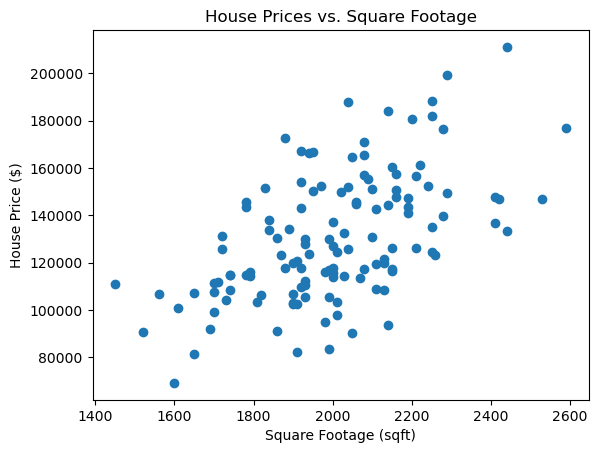

In [25]:
###############################################################
# TODO-01: Make a scatter plot using plt.scatter. Place in an #
# x and y label for living area and price.                    #
###############################################################
plt.scatter(X, y)
plt.title("House Prices vs. Square Footage")
plt.xlabel("Square Footage (sqft)")
plt.ylabel("House Price ($)")
plt.show()
###############################################################
#                    End of your code.                        #
###############################################################

Looking at the data, there is a linear trend where as the living area increases, the price also increases.

Let's fit a linear model to this data.

Use the `LinearRegression` model from `scikit-learn`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [26]:
from sklearn.linear_model import LinearRegression

In [ ]:
###############################################################
# TODO-02: Create a linear regression model and fit it to the #
# data we have.                                               #
###############################################################
X1 = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X1, y)

# Predict the prices using the model
predicted_prices = model.predict(X1)

###############################################################
#                    End of your code.                        #
###############################################################


Intercept: -10091.12990912312
Coefficient: 70.22631824288521


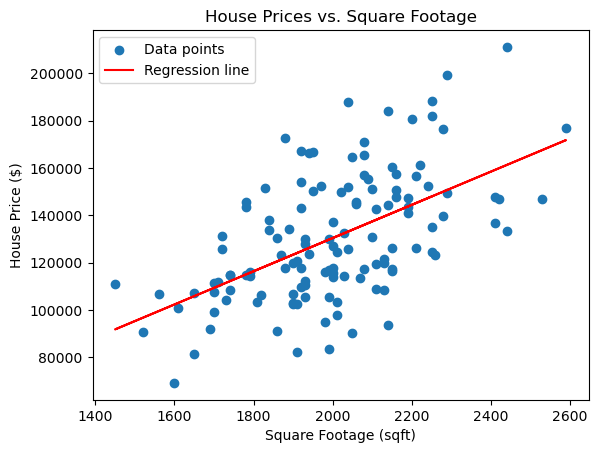

In [28]:
###############################################################
# TODO-03: Plot the line learned by the model overlayed on    #
# top of the scatter plot of the data. Don't forget to add    #
# labels to the axes.                                         #
###############################################################
plt.scatter(X1, y, label="Data points")
plt.plot(X1, predicted_prices, color="red", label="Regression line")
plt.title("House Prices vs. Square Footage")
plt.xlabel("Square Footage (sqft)")
plt.ylabel("House Price ($)")
plt.legend()
plt.show()

###############################################################
#                    End of your code.                        #
###############################################################

Visualizing the data in a plot like above is a luxury we have only if the data is in 2D. 
For higher dimensions, we want to compute for metrics that give us some insights into how good the fit is.
A common metric is the root mean squared error (RMSE).

In [29]:
###############################################################
# TODO-04: Implement the root mean squared error function.    #
###############################################################
def compute_rmse(y, y_pred):
    pass

###############################################################
#                    End of your code.                        #
###############################################################


In [30]:

###############################################################
# TODO-05: Compute the RMSE of the model predictions on the   #
# training set.                                               #
###############################################################
rmse = None
###############################################################
#                    End of your code.                        #
###############################################################

print("Root mean squared error for the training set: {:0.4f}".format(rmse))

TypeError: unsupported format string passed to NoneType.__format__

<span style='color:red'>**Question 01:**</span> Based from the visualizations above, if all we have is the feature `sqft`, is there a way to improve the model for this data? Justify your answer. Explain why or why not.

<span style='color:red'>**A01:**</span> 

<span style='color:red'>**TODO-06:**</span> Experiment on including / excluding the different features available in the dataset and look at their goodness of fit in terms of RMSE. You may add as many cells below as necessary. Note that you may need to do some pre-processing / feature engineering.

<span style='color:red'>**Question 02:**</span> What is the subset of features that achieves the best RMSE?

<span style='color:red'>**A02:**</span> 

### Polynomial Features

The "linear" in linear regression does not mean it could only produce lines. In fact, we can fit polynomial curves using linear regression if we add polynomial features. 

Let's create a toy example to illustrate this idea. We'll use a simple sine wave and generate some noisy data points from the sine wave.

In [ ]:
n_pts = 20
np.random.seed(1)
X_sin = np.random.uniform(-1.0,1.0, size=(n_pts,1))
y_sin = np.sin(6*X_sin.squeeze())  + np.random.randn(n_pts)*0.5
plt.scatter(X_sin,y_sin, color="orange", label="data")

x_true = np.linspace(-1,1,1000)
y_true = np.sin(6*x_true)
plt.plot(x_true, y_true, color="blue", label="True underlying function")
plt.legend()

In [ ]:
###############################################################
# TODO-07: Create a linear regression model and fit it to the #
# toy data.                                                   #
###############################################################


###############################################################
#                    End of your code.                        #
###############################################################

In [ ]:
###############################################################
# TODO-08: Plot the line learned by the model overlayed on    #
# top of the scatter plot of the data. Don't forget to add    #
# labels to the axes.                                         #
###############################################################


###############################################################
#                    End of your code.                        #
###############################################################

Obviously, fitting a line to a sine wave will never produce a good fit.  

To generate curves using linear regression, we need to add polynomial features.

Let $x_\text{sin}$ be your original data. For this toy example, this would only be a 1-dimensional vector. To add polynomial features, we simply append a copy of the features with different orders of exponent. The polynomial order is a hyperparameter that we set, which dictates the highest polynomial order that we will include. For example, the equation below shows polynomial features with an order of 2 and an order of 5.
$$x_\text{poly-2} = [ x_\text{sin}^0, x_\text{sin}^1, x_\text{sin}^2 ]$$  
$$x_\text{poly-5} = [ x_\text{sin}^0, x_\text{sin}^1, x_\text{sin}^2, x_\text{sin}^3, x_\text{sin}^4, x_\text{sin}^5 ]$$  


In [ ]:
###############################################################
# TODO-09: Implement a function that adds polynomial features #
# to the input x matching the specified polynomial order.     #
###############################################################
def add_polynomial_features(x, order=2):
    pass

###############################################################
#                    End of your code.                        #
###############################################################

After transforming the input to add polynomial features, we can directly train a linear regression model on top of it.

In [ ]:
###############################################################
# TODO-10: Implement a function that first transforms the     #
# features and fits a linear regression model on top of       #
# the transformed features.                                   #
###############################################################

def fit_polynomial_regression(model, X,y, order=1):
    pass

###############################################################
#                    End of your code.                        #
###############################################################

In [ ]:
###############################################################
# TODO-11: Implement a function that transforms the new input #
# first before performing inference on the trained model.     #
###############################################################

def predict_polynomial_regression(model,X, order=1):
    pass

###############################################################
#                    End of your code.                        #
###############################################################

The code below fits a polynomial regression model and plots the learned polynomial curve.

In [ ]:
poly_order = 5

reg_model = fit_polynomial_regression(LinearRegression(),X_sin,y_sin, order=poly_order)

X_test = np.linspace(-1.0,1.0, 100)[:,None]
y_preds = predict_polynomial_regression(reg_model, X_test, order=poly_order)

plt.plot(X_test,y_preds)
plt.scatter(X_sin,y_sin, color="orange")
plt.ylim([-2,2])

Let's vary the hyperparameter polynomial order and see what the effects are as the order increases.

In [ ]:
X_test = np.linspace(-1.0,1.0, 100)[:,None]
plt.figure(figsize=(10,12))
for i in range(9):
    poly_order = 2*i + 1
    reg_model = fit_polynomial_regression(LinearRegression(),X_sin,y_sin, order=poly_order)
    y_preds = predict_polynomial_regression(reg_model, X_test, order=poly_order)
    plt.subplot(3,3,i+1)
    plt.plot(X_test,y_preds)
    plt.scatter(X_sin,y_sin, color="orange")
    plt.ylim([-2,2])
    plt.title("Poly order = {}".format(poly_order))

As the polynomial order increase, we start to see that the model is overfitting. But what happens if we have more data?

<span style='color:red'>**TODO-12:**</span> Using the same sine wave function used above, generate 1000 points instead of the 20 points used above. Repeat the same experiment where you fit polynomials of varying order and plot the results.

You can add as many cells as necessary below.

<span style='color:red'>**Question 03:**</span> Based on your experiments above, what can you say about about the behavior of overfitting in relation to the polynomial order and dataset size?

<span style='color:red'>**A03:**</span>

One possibility in combatting overfitting is to regularize the model. For linear regression, there is a well known variant called ridge regression which penalizes large weights. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

<span style='color:red'>**TODO-13:**</span> Repeat the experiment above on the sine wave toy dataset with only 20 points, and plot the learned curves as the polynomial order increases.

You can add as many cells as necessary below.

In [ ]:
from sklearn.linear_model import Ridge

# Unsupervised Learning (k-Means Clustering)

In [ ]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.datasets import make_blobs

Let's create toy datasets with varying number of clusters (3, 5, 10, 15, 25).

In [ ]:
dummy_data = {}
n_clusters = [3, 5, 10, 15, 25]
np.random.seed(1)
for n_cluster in n_clusters:
    X, y = make_blobs(n_samples=1000, centers=n_cluster, n_features=2,cluster_std=1,center_box=(-50,50))
    dummy_data[n_cluster] = {"X":X, "y":y}

In [ ]:
plt.figure(figsize=(10,2))
for i, n_cluster in enumerate(n_clusters):
    plt.subplot(1,len(n_clusters),i+1)
    # plot each cluster with a different color
    X_blob = dummy_data[n_cluster]["X"]
    y_blob = dummy_data[n_cluster]["y"]
    plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False) 
    plt.title("Clusters = {}".format(n_cluster))

To perform $k$-Means clustering, we need to set the hyperparameter $k$. This is our guess as to how many clusters there in your data.

However, in many cases, we do not know what $k$ should be.
As mentioned above, we only have the luxury of visualizing the data points (and the clustering behavior) if the data lies in 2D (or 3D). But in many real world cases, we have to rely on statistics or some metrics to capture some properties of your data.

One of the earliest approaches that tried to determine the value of $k$ was to use the inertia, which is defined as the sum of squared distances of the data points to their closest cluster center. People would plot the intertia and look for the knee of the curve (or elbow of the curve). This is the point where the curve visibly bends from high slope to low slope. 

In this notebook, you will investigate the performance of this method and compare it against more recent clustering metrics:

- Calinski and Harabasz score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)
- Davies-Bouldin score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)
- Silhouette score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)

<span style='color:red'>**TODO-14:**</span> Given the 5 toy datasets above wth different number of clusters, use $k$-Means clustering to cluster each of the toy datasets. Perform clustering with varying values of $k$ from 2 to 25 and plot the inertia for each value of $k$. You can get the inertia from the `intertia_` property of the k-Means model (as documented in https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Use the `KneeLocator` from the `kneed` library to determine the knee or elbow of the intertia curve. (https://kneed.readthedocs.io/en/stable/parameters.html)

You should generate 2 plots corresponding to the visualized clusters (colored scatter plot) and the inertia curves for each of the toy datasets (total of 10 plots ==> 5 datasets x 2 plots each). Visualize the knee or elbow point using `axvline`. Don't forget to label the plots.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html

You can add as many cells as necessary below.

In [ ]:
from kneed import KneeLocator

<span style='color:red'>**TODO-15:**</span> Repeat the same experiment / plots but this time using the three other metrics:
- Calinski and Harabasz score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)
- Davies-Bouldin score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)
- Silhouette score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)

Note that for these metrics there is no need to locate for the knee or elbow because there will be a clear max (or min) score for these metrics, which will indicate the best guess for $k$.

Particularly:
- Calinski and Harabasz score (higher is better)
- Davies-Bouldin score (lower is better)
- Silhouette score (higher is better)

You can add as many cells as necessary below.

<span style='color:red'>**Question 04:**</span> Based on your experiments, which one had the best guess for $k$ over all the toy datasets?

<span style='color:red'>**A04:**</span>

<span style='color:red'>**Question 05:**</span> Looking at the visualizations of the predicted clusters for each of the metrics (only for the toy data clusters=25), are the mistakes reasonable? Why or why not?

<span style='color:red'>**A05:**</span>

<span style='color:red'>**Question:**</span> How much time did it take you to answer this notebook?

<span style='color:red'>**A:**</span>